In [8]:
import pandas as pd
from ase.io import read
import numpy as np
from collections import Counter
import math, re

In [22]:
def read_cif(file_path):

    ddec_data = []
    length = []
    with open(file_path, 'r') as f:
        lines = f.readlines()
        idex_x = []
        idex_ddec = []
        for i, line in enumerate(lines):
            if " _atom_site_charge" in line:
                idex_ddec.append(i + 1)
            elif " _atom_site_fract_x" in line:
                idex_x.append(i + 1)
        diff_x_ddec = int(idex_ddec[0]) - int(idex_x[0])
        for line in lines:
            length.append(len(line.split()))
        for line in lines:
            if len(line.split()) == 8:
                try:
                    split_line = re.split(r"[ ]+", line)
                    ddec = float(split_line[diff_x_ddec + 3])
                    ddec_data.append(ddec)
                except:
                    pass
    
    atoms = read(file_path)
    data = {
            'element': atoms.get_chemical_symbols(),
            'x': atoms.get_positions()[:, 0],
            'y': atoms.get_positions()[:, 1],
            'z': atoms.get_positions()[:, 2],
            'charge': ddec_data
    }
    return pd.DataFrame(data)

def compare_atoms(df1, df2):
    merged = df1.merge(df2, on=['element', 'x', 'y', 'z'], how='outer', indicator=True)
    unique_to_df1 = merged[merged['_merge'] == 'left_only'].drop(columns=['_merge'])
    return unique_to_df1

def calculate_formula_and_charge(df):
    element_counts = Counter(df['element'])
    formula = ''.join(f"{el}{cnt}" for el, cnt in element_counts.items())
    gcd = math.gcd(*element_counts.values())
    total_charge = df['charge_x'].sum()
    return formula, gcd, total_charge

In [24]:
df1 = read_cif('./charge/ADOBAX_charged_pacman.cif')
df2 = read_cif('./charge/ADOBAX_charged_freeONLY_pacman.cif')


unique_atoms = compare_atoms(df1, df2)
formula, gcd, total_charge = calculate_formula_and_charge(unique_atoms)

print(f"Chemical formula: {formula}")
print(f"Greatest common divisor: {gcd}")
print(f"Total charge: {total_charge}")

Chemical formula: Cl2
Greatest common divisor: 2
Total charge: -1.5232105136


In [25]:
names = pd.read_csv("./ions_check.csv")["name"]

for name in names:
    df1 = read_cif('./charge/'+name+'_pacman.cif')
    df2 = read_cif('./charge/'+name+'_freeONLY_pacman.cif')
    
    unique_atoms = compare_atoms(df1, df2)
    formula, gcd, total_charge = calculate_formula_and_charge(unique_atoms)
    
    print(formula,total_charge/gcd)

Cl2 -0.7616052568
Cl2 -0.7617046773
Cl2 -0.8029345572
F2 -0.64737092705
F2 -0.642673701
Br2 -0.7414421141
N2O6 -0.5681153566000001
F18Sb3 -1.0438553868333338
C8H32N4 0.7076510721
N8O24 -0.5147862633
N6O18 -0.4222062875666667
C8H32N4 0.6723691700249997
C8H32N4 0.6191551721999999
C12H60N12 0.6335973994333334
H12N3 0.6179899573
N4O12 -0.557688102
N4O12 -0.5637386888
N2O6 -0.6658813207
C8H32N4 0.7780117905000001
Cl4O16 -0.7945742903999997
Cl12O48 -0.1657081258166667
N4O12 -0.3521125317
B6F24 -0.7571224223
F24P4 -0.7006209939000003
C8H32N4 0.6875322174999998
B4F8 -0.13719414384999998
C8H32N4 0.7076307937999999
C12H36N3 0.5627387696999998
C12H36N3 0.2756640446
N4O12 -0.5560726377249999
C16H64N8 0.6849893804
C8H24N4 0.19366101675000003
Cl4 -0.743205592
C6F18O18S6 -0.7219001527
C6F18O18S6 -0.7516131722666666
N4O12 -0.5474930032499998
Cl4O16 -0.566798264775
N4O12 -0.447541296425
Br4 -0.5911275147999999
Cl2O8 -0.6589324025999999
Cl4O16 -0.6876980662499999
C20H48N4 0.8605959312
Cl8Co2 -1.57416077

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

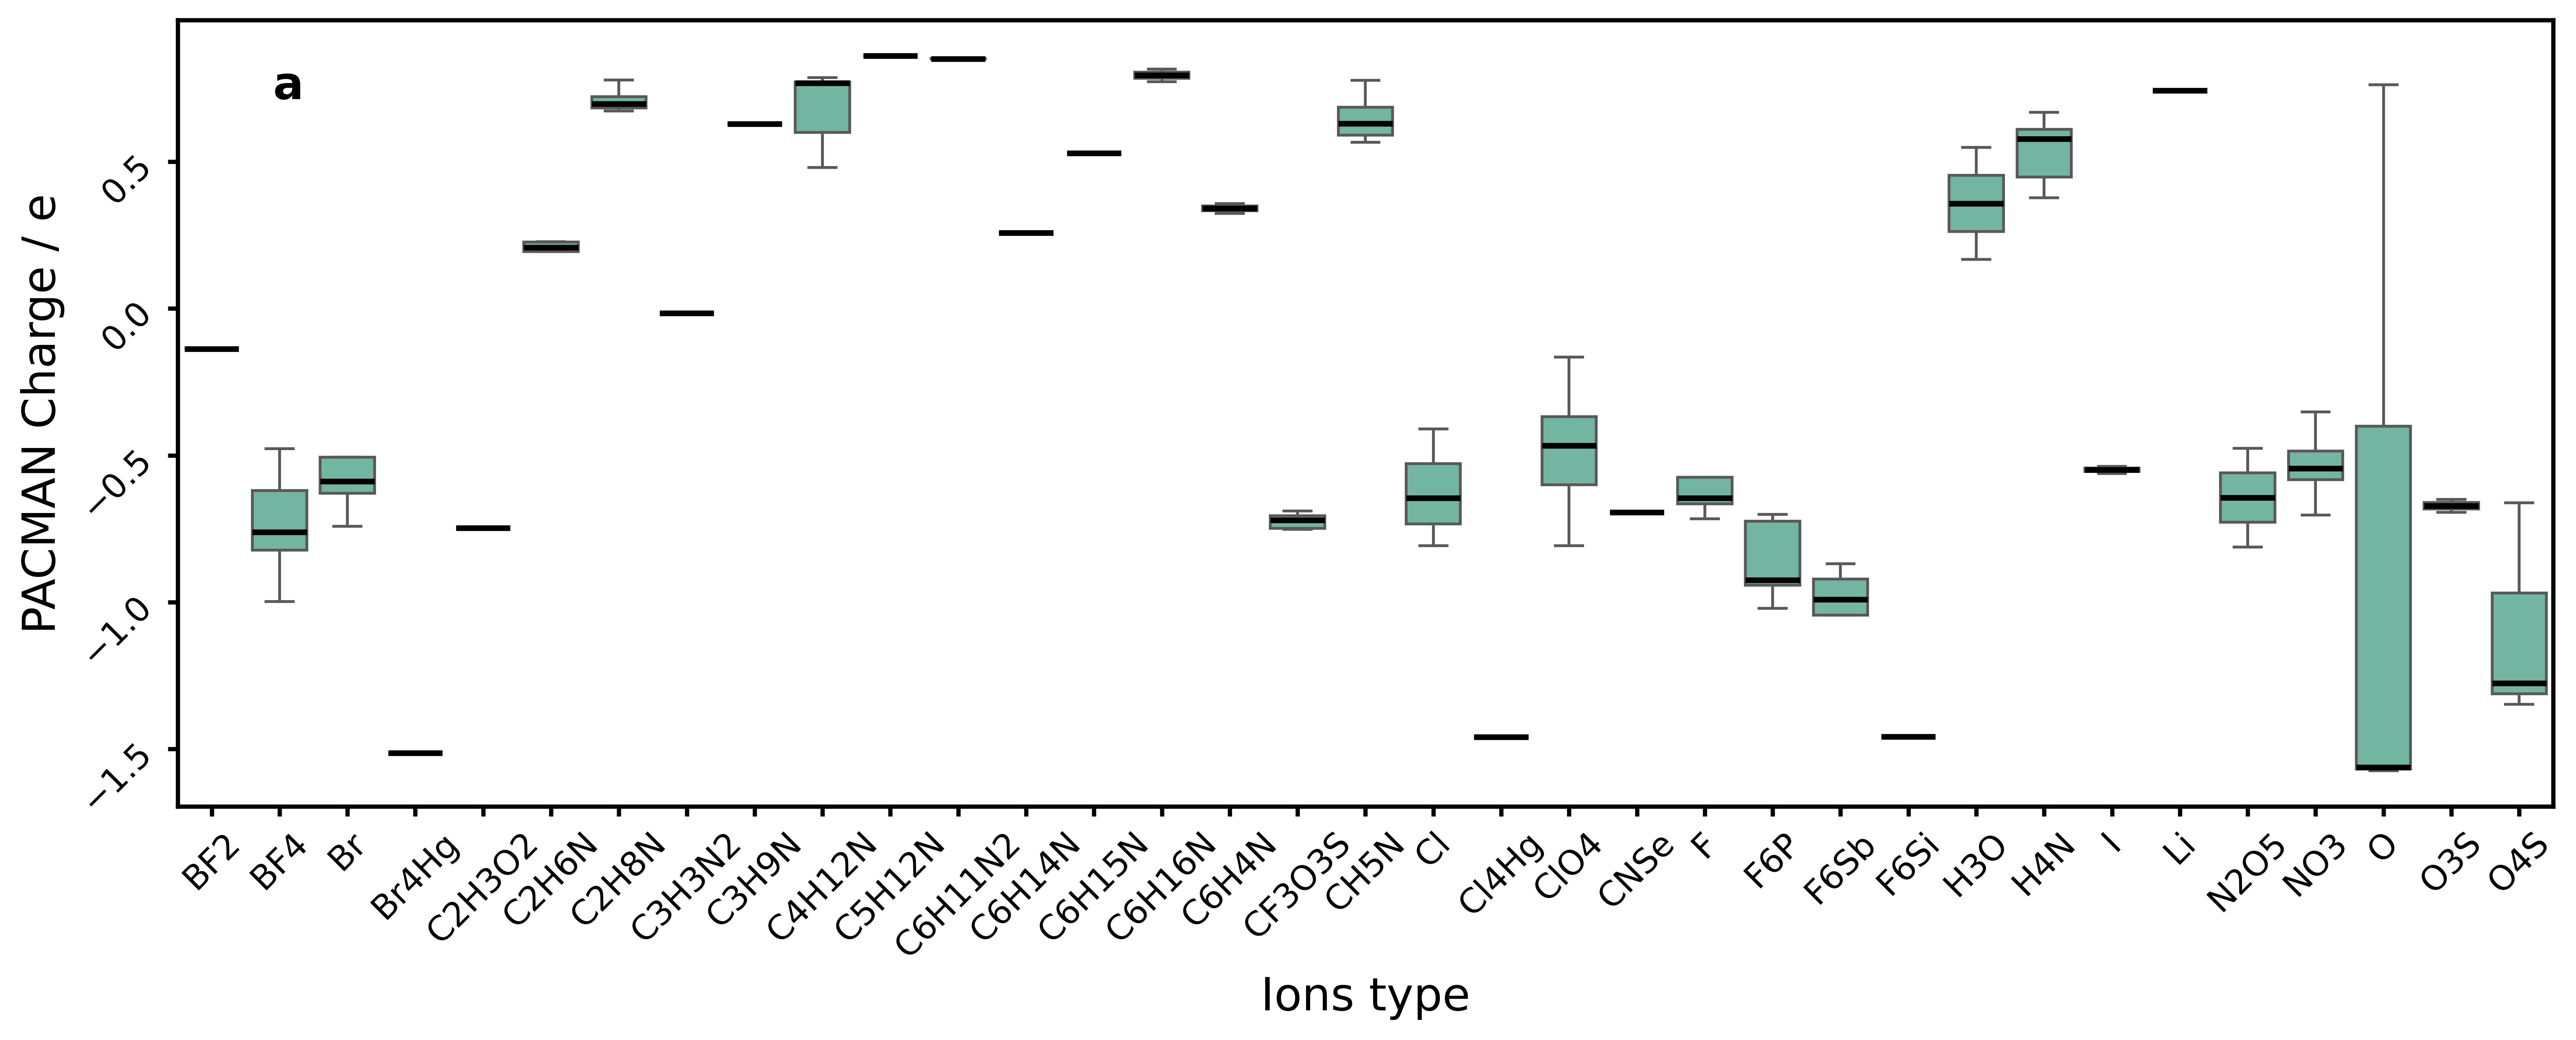

In [31]:
data = pd.read_csv("./ions_check.csv")

ions_unique = data['ions'].unique()
n_per_group = len(ions_unique) // 1

data['group'] = ''

for i, ion in enumerate(ions_unique):
    group_number = i // n_per_group
    data.loc[data['ions'] == ion, 'group'] = f'Group {group_number+1}'

fig = plt.figure(figsize=(15,5),dpi=600)
ax = fig.add_subplot(111)

sns.boxplot(x='ions', y='mean', hue='group', data=data,
            medianprops={"color": "k", "linewidth": 2},
            palette="Set2", showfliers=False,legend=False)

plt.tick_params(labelrotation=45)
plt.xlabel('Ions type', fontsize=16)
plt.ylabel('PACMAN Charge / e', fontsize=16)

plt.gca().spines['top'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['right'].set_linewidth(1.5)
plt.gca().tick_params(axis='both', which='both', direction='out', width=1.5, labelsize=12)
plt.gca().minorticks_off()
ax.text(0.04,0.9,"a",fontdict={'size':16},fontweight='bold',transform=ax.transAxes)
plt.show()